<h1>Ataques adversarios</h1>
<p>En este cuaderno programaremos un ataque adversario a una AI de clasifiación de imagenes.</p>

In [33]:
import tensorflow as tf
import keras 
import numpy as np
import matplotlib.pyplot as plt

In [34]:
from keras.applications.inception_v3 import InceptionV3, decode_predictions
from keras import backend as k

In [35]:
iv3 = InceptionV3()

In [50]:
from keras.preprocessing import image

x = image.img_to_array(image.load_img("./Imágenes/fakelemon.png", target_size=(299,299)))

x /= 255
x -=0.5
x *=2

x = x.reshape([1, x.shape[0],x.shape[1], x.shape[2]])

y = iv3.predict(x)

In [52]:
print(decode_predictions(y))
print(decode_predictions(y)[0][0][1])

[[('n07749582', 'lemon', 0.99823135), ('n07747607', 'orange', 0.0010298394), ('n04409515', 'tennis_ball', 0.00012066119), ('n07742313', 'Granny_Smith', 0.000115521754), ('n07753592', 'banana', 6.28453e-05)]]
lemon


<p>Hasta aquí probamos que la red neuronal funciona. :)</p>

In [44]:
inp_layer = iv3.layers[0].input
out_layer = iv3.layers[-1].output

target_class = 951

loss = out_layer[0, target_class]

grad = k.gradients(loss, inp_layer)[0]

optimize_gradient = k.function([inp_layer, k.learning_phase()], [grad, loss])

adv = np.copy(x)

pert = 0.01

max_pert = x + 0.01
min_pert = x - 0.01

cost = 0.0

while cost < 0.95:
    gr, cost = optimize_gradient([adv, 0])
    
    adv += gr
    
    adv = np.clip(adv, min_pert, max_pert)
    adv = np.clip(adv, -1, 1)
    
    print("Target cost:", cost)
    
fake_img = np.copy(adv)

Target cost: 0.00010008211
Target cost: 0.00010134203
Target cost: 0.000102654376
Target cost: 0.00010399238
Target cost: 0.00010534388
Target cost: 0.000106715765
Target cost: 0.00010810232
Target cost: 0.000109515844
Target cost: 0.00011094099
Target cost: 0.00011236911
Target cost: 0.000113831
Target cost: 0.00011532023
Target cost: 0.00011683312
Target cost: 0.00011835358
Target cost: 0.00011988861
Target cost: 0.000121451754
Target cost: 0.00012302563
Target cost: 0.00012462486
Target cost: 0.00012625827
Target cost: 0.000127932
Target cost: 0.00012961435
Target cost: 0.00013132535
Target cost: 0.00013305424
Target cost: 0.00013478725
Target cost: 0.00013655891
Target cost: 0.00013837023
Target cost: 0.00014020884
Target cost: 0.00014208962
Target cost: 0.00014401069
Target cost: 0.00014597643
Target cost: 0.00014797604
Target cost: 0.00015004871
Target cost: 0.00015221447
Target cost: 0.00015448347
Target cost: 0.00015681039
Target cost: 0.00015919216
Target cost: 0.00016163822
T

In [45]:
adv /= 2
adv += 0.5
adv *= 255

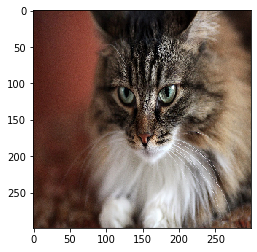

In [46]:
plt.imshow(adv[0].astype(np.uint8))
plt.show()

In [48]:
from PIL import Image
im = Image.fromarray(adv[0].astype(np.uint8))
im.save("./Imágenes/fakelemon.png")